In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

C:\Users\hp\Anaconda3.0\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Loading in the Data

In [2]:
data = pd.read_csv('who_suicide_statistics.csv')
sns.set_style('darkgrid')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
data.count()

country        43776
year           43776
sex            43776
age            43776
suicides_no    41520
population     38316
dtype: int64

## Dealing with missing Data

In [5]:
# % of missing data in each column
(data.isnull().sum())/43776 * 100

country         0.000000
year            0.000000
sex             0.000000
age             0.000000
suicides_no     5.153509
population     12.472588
dtype: float64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

## Explanatory Data Analysis

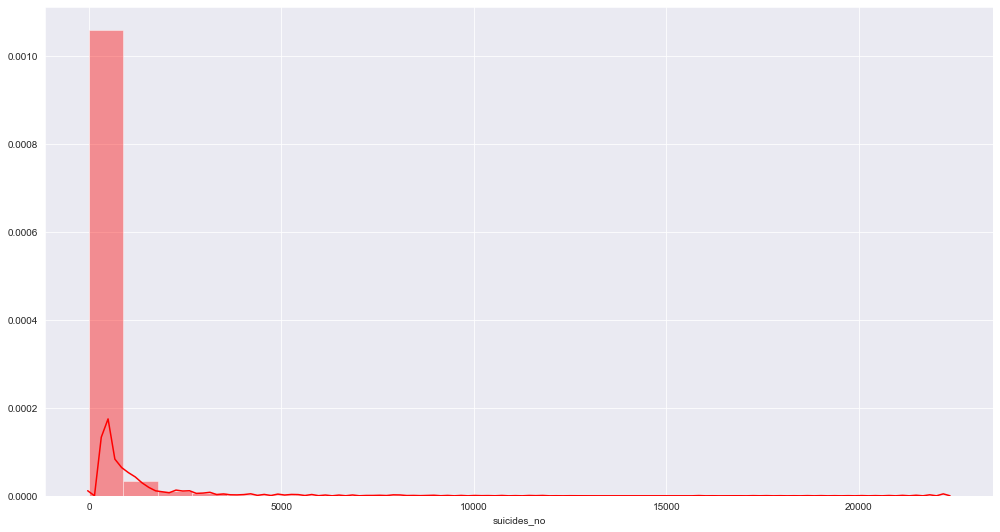

In [8]:
plt.figure(figsize=(17,9))
sns.distplot(data['suicides_no'],color='red',bins=25)

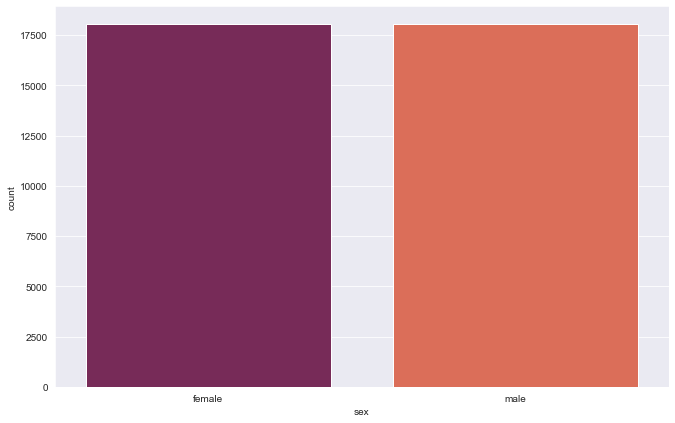

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(data['sex'],palette='rocket')

In [10]:
#The sex column is balanced, hence we have equal amount of male and female

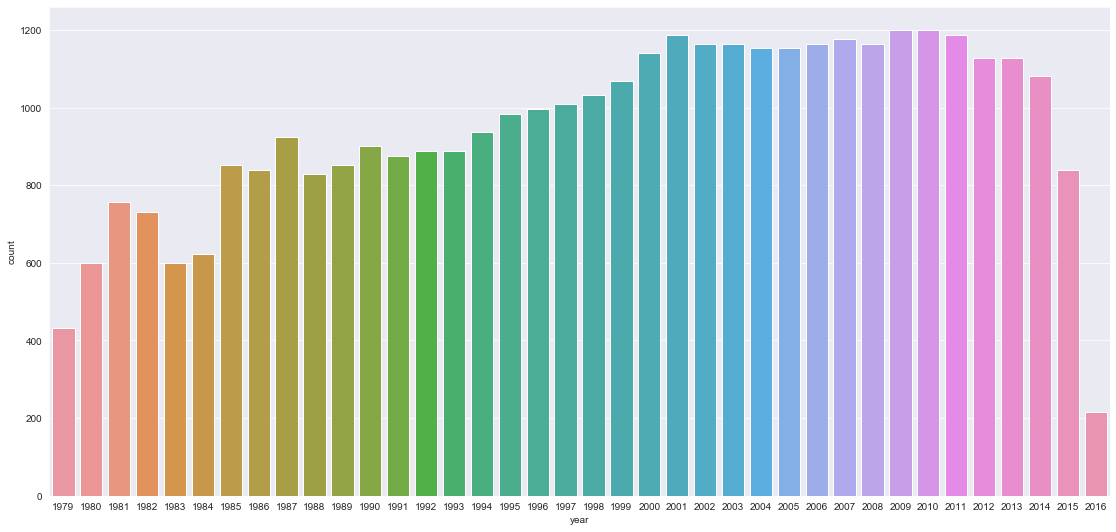

In [11]:
plt.figure(figsize=(19,9))
sns.countplot(data['year'])

In [12]:
#unlike the sex column, we do not have equal amount of years

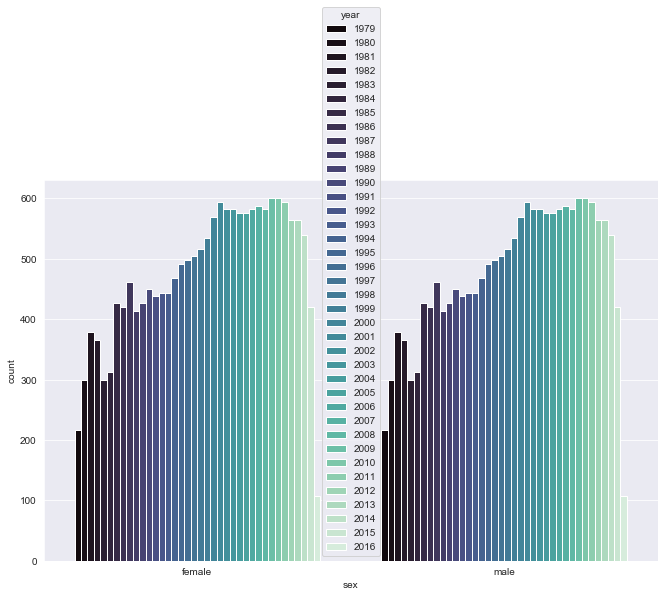

In [13]:
plt.figure(figsize=(11,7))
sns.countplot(data['sex'],palette='mako',hue=data['year'])

<Figure size 1224x648 with 0 Axes>

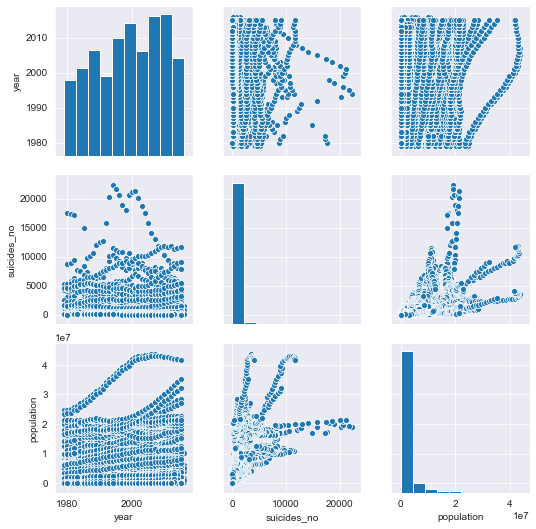

In [14]:
plt.figure(figsize=(17,9))
sns.pairplot(data,palette='rocket')

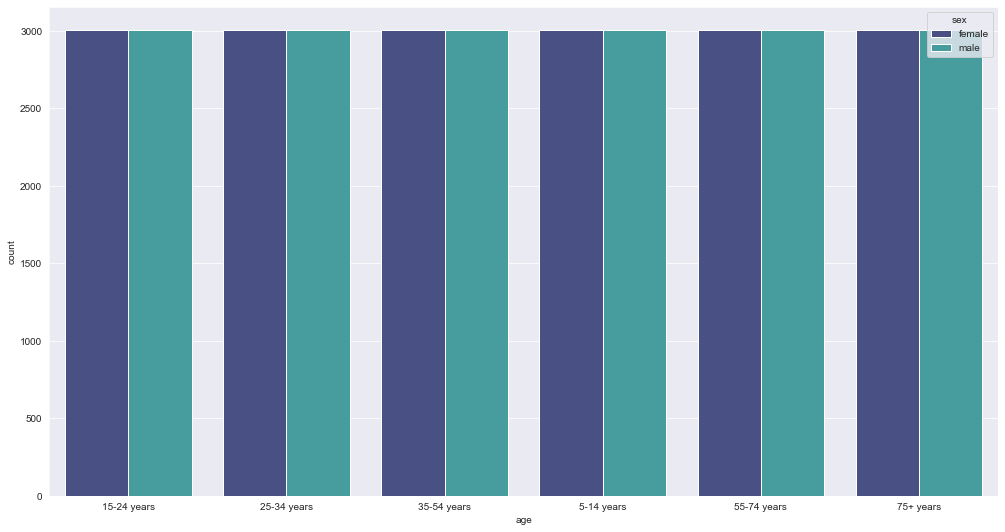

In [15]:
plt.figure(figsize=(17,9))
sns.countplot(data['age'],hue=data['sex'],palette='mako')

In [17]:
data['country'].mode()

0        Hungary
1    Netherlands
dtype: object

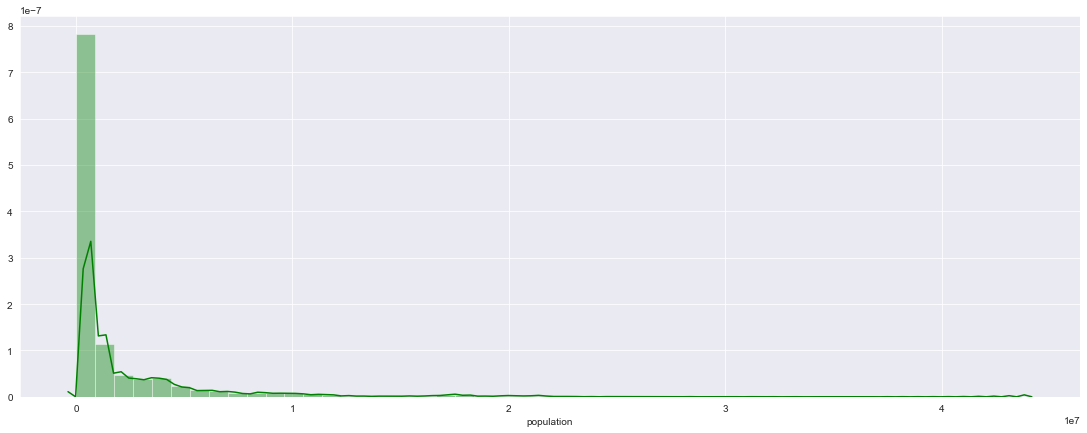

In [18]:
plt.figure(figsize=(19,7))
sns.distplot(data['population'],color='green')

In [19]:
data['population'].mean()

1699995.7256239601

In [20]:
data['suicides_no'].value_counts()

0.0       5936
1.0       2146
2.0       1489
3.0       1129
4.0        907
          ... 
2494.0       1
1475.0       1
3076.0       1
828.0        1
2628.0       1
Name: suicides_no, Length: 2231, dtype: int64

In [21]:
data['suicides_no'].count()

36060

In [24]:
no_suicides =  data.loc[data['suicides_no']==0]

In [25]:
mass_suicides =  data.loc[data['suicides_no']>0]

In [26]:
#check for age people commit suicides the most
mass_suicides['age'].mode()

0    35-54 years
dtype: object

In [27]:
#check for country people commit suicides the most
mass_suicides['country'].mode()

0    Netherlands
dtype: object

In [33]:
mass_suicides['suicides_no'].sum()

7998467.0

In [34]:
data.loc[data['suicides_no']>1000]['country'].mode()

0    Japan
dtype: object

In [35]:
mass_suicides.loc[mass_suicides['country']=='Japan']['suicides_no'].sum()

937614.0

In [36]:
mass_suicides.loc[mass_suicides['country']=='Netherlands']['suicides_no'].sum()


60205.0

In [37]:
#check for the people committed suicides the most
mass_suicides['year'].mode()

0    2010
dtype: int64

In [38]:
mass_suicides['suicides_no'].mode()

0    1.0
dtype: float64

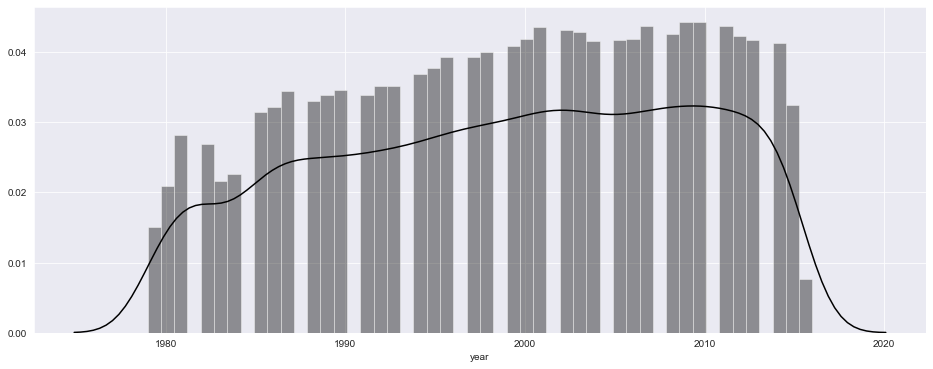

In [39]:
#To see the distribution of year in the major suicides countries
plt.figure(figsize=(16,6))
sns.distplot(mass_suicides['year'],bins=50,color='black')

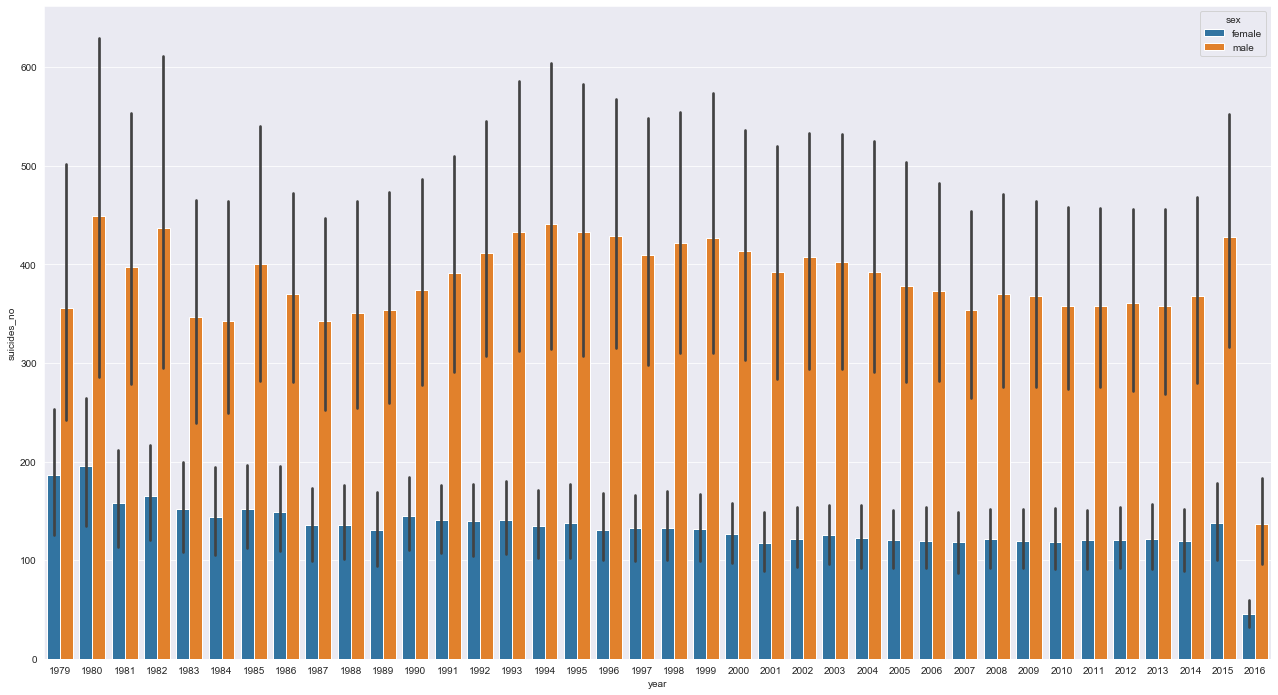

In [40]:
#this is showing the rate of suicides in male,female wrt the year it happened
plt.figure(figsize=(22,12))
sns.barplot(mass_suicides['year'],mass_suicides['suicides_no'],hue=mass_suicides['sex'])

In [41]:
#2010 with more males committing suicides recorded as the highest

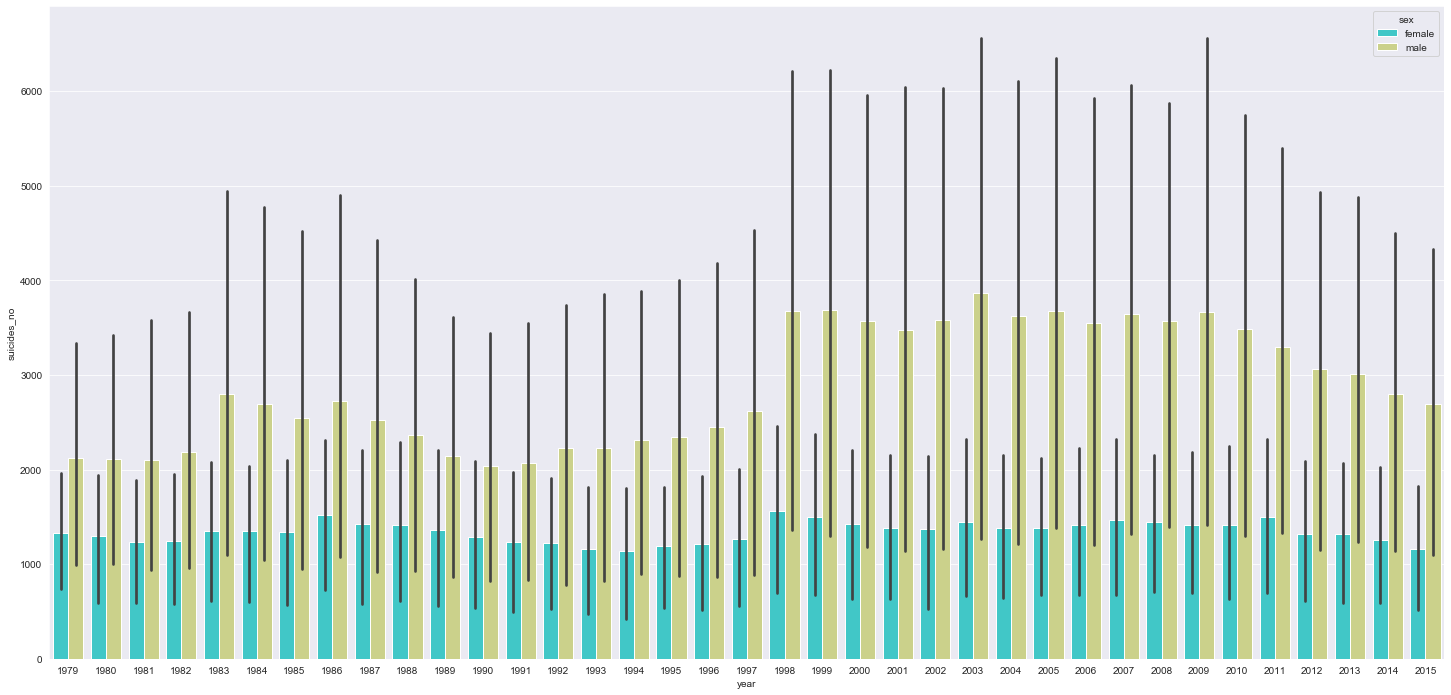

In [42]:
#Showing the stats of Japan.
plt.figure(figsize=(25,12))
sns.barplot(mass_suicides['year'].loc[mass_suicides['country']=='Japan'],
                                      mass_suicides['suicides_no'].loc[mass_suicides['country']=='Japan'],
                                                                   hue=mass_suicides['sex'],palette='rainbow')

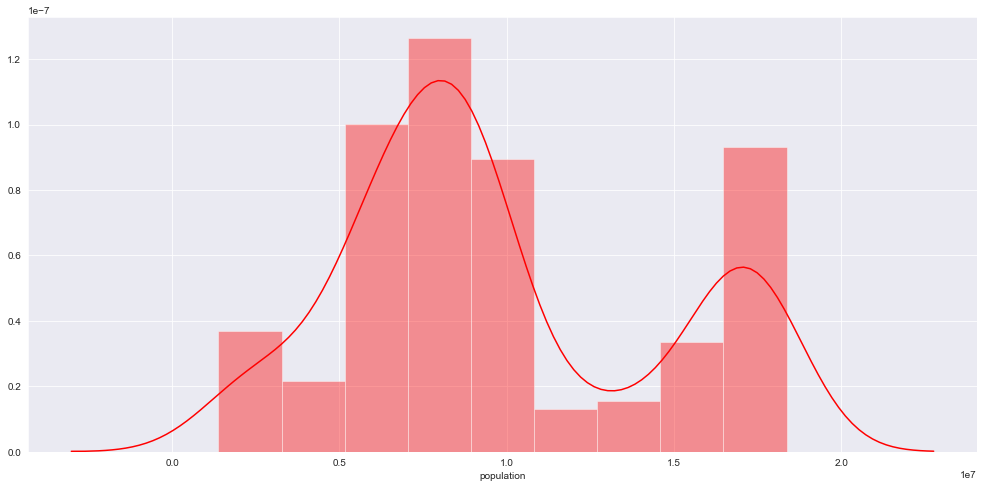

In [43]:
#wrt to population this time
plt.figure(figsize=(17,8))
sns.distplot(mass_suicides.loc[mass_suicides['country']=='Japan']['population'],color='red')

In [44]:
#population do not neccessary means  increase in suicides in Japan

In [45]:
mass_suicides['population'].mean()

2013969.3034457576

In [46]:
#low population here, hence population is major factor in increament in suicides in general case scenario
no_suicides['population'].mean()

106643.28992587602

In [47]:
no_suicides['sex'].mode()

0    female
dtype: object

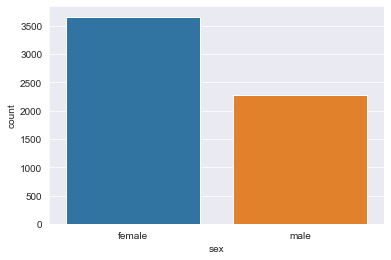

In [48]:
sns.countplot(no_suicides['sex'])

In [49]:
mass_suicides['sex'].mode()

0    male
dtype: object

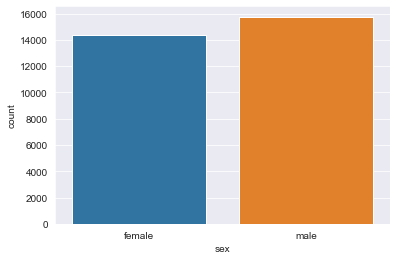

In [50]:
sns.countplot(mass_suicides['sex'])

In [51]:
#This brought us to the conclusion , females cherish their lives more than males

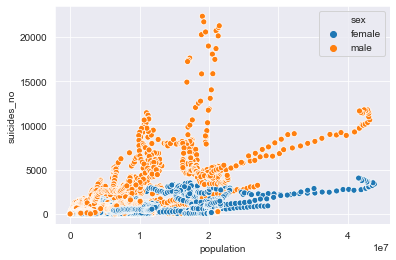

In [52]:
sns.scatterplot(mass_suicides['population'],mass_suicides['suicides_no'],hue=mass_suicides['sex'])

In [53]:
#This shows that large population is not criteria for suicide

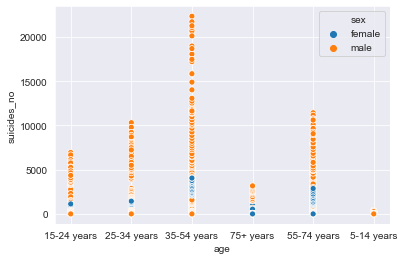

In [54]:
sns.scatterplot(mass_suicides['age'],mass_suicides['suicides_no'],hue=mass_suicides['sex'])

In [55]:
#This shos rate of suicides with respect to age